In [54]:
import pandas
import matplotlib
import numpy
import datetime
import sklearn.tree
import sklearn.grid_search
import pandas_datareader.data 
%matplotlib inline

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [15]:
# have to do the regression twice.. for buyers and sellers. and u want to know the most positive min in each instance.
# think about the information u have.. what is volatility like. what is volatility like in other currencies.
# what direction is it trend 15mins. 5mins. and 1min.
# what time of day is it.
# based on this what is the best time to hedge, if u want to avoid volatility. ie if it moves agst u... hold on. 
# if it doesnt move against u. cover in 1 min.
# results should be the same for buyers and sellers
# so what data do i want
# 1. time in hour bucket
# 2. standard deviation in 1 minute, 8 minute and 15 minute periods
# 3. price return in 1 minute, 8 minute and 15 minute periods
# 4. relative difference in standard deviation in 1 minute, 8 minute and 15 minute periods from eurusd and usdjpy
# 5. relative differences in price return in 1 minute, 8 minute and 15 minute periods from eurusd and usdjpy
# 6. what minute post trade is the price deviation, the most positive, the most negative, and the closest to zero
# use 1-5 to see their respective predictive powers for 6
# decision tree from 1-5 to pick most positive, most negative and closest to zero; this is the project goal

# so what do i need to do to get the data i want
# 1. import the eurusd and usdjpy price data
# 2. combine them with audusd price data
# 3. create a column which numbers each an hour from 0-23
# 4. create 9 columns which give the standard deviation in 1min, 8min and 15min for each currency
# 5. create 9 columns which give the preceding price return for each currency in 1min, 8min and 15min for each ccy
# 6. create 6 new columns which are the difference between aud SD and eur and jpy SD
# 7. create 6 new columns which are the difference between aud returns and eur and jpy returns
# 8. create 3 new columns which give the minute with the most positive, most negative and closest to zero aud returns

# then what regression.. i suspect random forest and decision tree

In [21]:
# import raw data; AUDUSD 1 min intervals


aud_data = pandas.read_csv('ga_project/HIST DATA/DAT_ASCII_AUDUSD_M1_2016.csv')

aud_data

,date,time,price,return_1,return_8,return_15,hour_bucket
0,20160103,170000,0.72832,0.000000,0.000000,0.000000,17
1,20160103,170300,0.72824,-0.000110,0.000000,0.000000,17
2,20160103,170400,0.72844,0.000275,0.000000,0.000000,17
3,20160103,170500,0.72850,0.000082,0.000000,0.000000,17
4,20160103,170600,0.72846,-0.000055,0.000000,0.000000,17
5,20160103,170800,0.72848,0.000027,0.000000,0.000000,17
6,20160103,170900,0.72859,0.000151,0.000000,0.000000,17
7,20160103,171000,0.72858,-0.000014,0.000000,0.000000,17
8,20160103,171100,0.72870,0.000165,0.000522,0.000000,17
9,20160103,171200,0.72865,-0.000069,0.000563,0.000000,17


In [17]:
#aud_data.to_csv('out1.csv')

In [24]:
aud_data
hours = aud_data['time']
aud_hours = aud_data.ix[:, ['date','time','hour_bucket']]
hours

0         170000
1         170300
2         170400
3         170500
4         170600
5         170800
6         170900
7         171000
8         171100
9         171200
10        171400
11        171500
12        171600
13        171800
14        171900
15        172000
16        172100
17        172300
18        172400
19        172600
20        172700
21        172800
22        172900
23        173000
24        173100
25        173200
26        173300
27        173400
28        173500
29        173600
           ...  
370975    162500
370976    162600
370977    162700
370978    162800
370979    162900
370980    163000
370981    163100
370982    163200
370983    163300
370984    163400
370985    163500
370986    163600
370987    163800
370988    163900
370989    164100
370990    164200
370991    164300
370992    164400
370993    164500
370994    164600
370995    164800
370996    164900
370997    165000
370998    165100
370999    165200
371000    165300
371001    165400
371002    1655

In [25]:
# standard deviation

std2 = aud_data['price'].rolling(2).std()
std8 = aud_data['price'].rolling(8).std()
std15 = aud_data['price'].rolling(15).std()


In [26]:
# price returns

aud_datetime = aud_data.ix[:, ['date','time','hour_bucket']]
aud_lows = aud_data.ix[:, ['price']]
aud_returns = aud_data.ix[:,['return_1','return_8','return_15']]
aud_returns_data = pandas.concat([aud_datetime,aud_returns,aud_lows], axis=1)
aud_returns_data.columns = ['date','time','hour_bucket','return_1','return_8','return_15','price']



In [27]:

aud_price = aud_returns_data.ix[:, ['price']]
len(aud_price.columns)
aud_price1 = aud_price.price.shift(1)
aud_wlagged = pandas.concat([aud_returns_data,aud_price1], axis=1)
len(aud_wlagged.columns)
aud_price1 = aud_price.price.shift(1)
aud_price2 = aud_price.price.shift(2)
aud_price3 = aud_price.price.shift(3)
aud_price4 = aud_price.price.shift(4)
aud_price5 = aud_price.price.shift(5)
aud_price6 = aud_price.price.shift(6)
aud_price7 = aud_price.price.shift(7)
aud_price8 = aud_price.price.shift(8)
aud_price9 = aud_price.price.shift(9)
aud_price10 = aud_price.price.shift(10)
aud_price11 = aud_price.price.shift(11)
aud_price12 = aud_price.price.shift(12)
aud_price13 = aud_price.price.shift(13)
aud_price14 = aud_price.price.shift(14)


aud_wlagged = pandas.concat([aud_returns_data,aud_price1], axis=1)
aud_wlagged = pandas.concat([aud_returns_data, std2, std8, std15, aud_price1,aud_price2,aud_price3,aud_price4,
                                aud_price5,aud_price6,aud_price7,aud_price8,aud_price9,aud_price10,
                                 aud_price11,aud_price12,aud_price13,aud_price14], axis=1)


In [28]:
aud_wlagged.columns = ['date', 'time','hour_bucket','return_1','return_8','return_15','price','std2', 'std8', 'std15','1min','2min','3min','4min','5min','6min','7min','8min','9min',
                      '10min','11min','12min','13min','14min']
aud_wlagged

,date,time,hour_bucket,return_1,return_8,return_15,price,std2,std8,std15,...,5min,6min,7min,8min,9min,10min,11min,12min,13min,14min
0,20160103,170000,17,0.000000,0.000000,0.000000,0.72832,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20160103,170300,17,-0.000110,0.000000,0.000000,0.72824,5.656854e-05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20160103,170400,17,0.000275,0.000000,0.000000,0.72844,1.414214e-04,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20160103,170500,17,0.000082,0.000000,0.000000,0.72850,4.242641e-05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20160103,170600,17,-0.000055,0.000000,0.000000,0.72846,2.828427e-05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,20160103,170800,17,0.000027,0.000000,0.000000,0.72848,1.414214e-05,NaN,NaN,...,0.72832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,20160103,170900,17,0.000151,0.000000,0.000000,0.72859,7.778175e-05,NaN,NaN,...,0.72824,0.72832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,20160103,171000,17,-0.000014,0.000000,0.000000,0.72858,7.071068e-06,0.000120,NaN,...,0.72844,0.72824,0.72832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,20160103,171100,17,0.000165,0.000522,0.000000,0.72870,8.485281e-05,0.000135,NaN,...,0.72850,0.72844,0.72824,0.72832,NaN,NaN,NaN,NaN,NaN,NaN
9,20160103,171200,17,-0.000069,0.000563,0.000000,0.72865,3.535534e-05,0.000095,NaN,...,0.72846,0.72850,0.72844,0.72824,0.72832,NaN,NaN,NaN,NaN,NaN


In [29]:
aud_wlagged[1] = aud_wlagged['price'] - aud_wlagged['1min']
aud_wlagged[2] = aud_wlagged['price'] - aud_wlagged['2min']
aud_wlagged[3] = aud_wlagged['price'] - aud_wlagged['3min']
aud_wlagged[4] = aud_wlagged['price'] - aud_wlagged['4min']
aud_wlagged[5] = aud_wlagged['price'] - aud_wlagged['5min']
aud_wlagged[6] = aud_wlagged['price'] - aud_wlagged['6min']
aud_wlagged[7] = aud_wlagged['price'] - aud_wlagged['7min']
aud_wlagged[8] = aud_wlagged['price'] - aud_wlagged['8min']
aud_wlagged[9] = aud_wlagged['price'] - aud_wlagged['9min']
aud_wlagged[10] = aud_wlagged['price'] - aud_wlagged['10min']
aud_wlagged[11] = aud_wlagged['price'] - aud_wlagged['11min']
aud_wlagged[12] = aud_wlagged['price'] - aud_wlagged['12min']
aud_wlagged[13] = aud_wlagged['price'] - aud_wlagged['13min']
aud_wlagged[14] = aud_wlagged['price'] - aud_wlagged['14min']


In [30]:
aud_wlagged['max'] = aud_wlagged[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]].idxmax(axis=1)
aud_wlagged['min'] = aud_wlagged[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]].idxmin(axis=1)
aud_wlagged

,date,time,hour_bucket,return_1,return_8,return_15,price,std2,std8,std15,...,7,8,9,10,11,12,13,14,max,min
0,20160103,170000,17,0.000000,0.000000,0.000000,0.72832,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20160103,170300,17,-0.000110,0.000000,0.000000,0.72824,5.656854e-05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
2,20160103,170400,17,0.000275,0.000000,0.000000,0.72844,1.414214e-04,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
3,20160103,170500,17,0.000082,0.000000,0.000000,0.72850,4.242641e-05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0
4,20160103,170600,17,-0.000055,0.000000,0.000000,0.72846,2.828427e-05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0
5,20160103,170800,17,0.000027,0.000000,0.000000,0.72848,1.414214e-05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0
6,20160103,170900,17,0.000151,0.000000,0.000000,0.72859,7.778175e-05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0
7,20160103,171000,17,-0.000014,0.000000,0.000000,0.72858,7.071068e-06,0.000120,NaN,...,0.00026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,1.0
8,20160103,171100,17,0.000165,0.000522,0.000000,0.72870,8.485281e-05,0.000135,NaN,...,0.00046,0.00038,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0
9,20160103,171200,17,-0.000069,0.000563,0.000000,0.72865,3.535534e-05,0.000095,NaN,...,0.00021,0.00041,0.00033,NaN,NaN,NaN,NaN,NaN,8.0,1.0


In [31]:

aud_wlagged[15] = (aud_wlagged['price']-aud_wlagged['1min']).abs()
aud_wlagged[16] = (aud_wlagged['price']-aud_wlagged['2min']).abs()
aud_wlagged[17] = (aud_wlagged['price']-aud_wlagged['3min']).abs()
aud_wlagged[18] = (aud_wlagged['price']-aud_wlagged['4min']).abs()
aud_wlagged[19] = (aud_wlagged['price']-aud_wlagged['5min']).abs()
aud_wlagged[20] = (aud_wlagged['price']-aud_wlagged['6min']).abs()
aud_wlagged[21] = (aud_wlagged['price']-aud_wlagged['7min']).abs()
aud_wlagged[22] = (aud_wlagged['price']-aud_wlagged['8min']).abs()
aud_wlagged[23] = (aud_wlagged['price']-aud_wlagged['9min']).abs()
aud_wlagged[24] = (aud_wlagged['price']-aud_wlagged['10min']).abs()
aud_wlagged[25] = (aud_wlagged['price']-aud_wlagged['11min']).abs()
aud_wlagged[26] = (aud_wlagged['price']-aud_wlagged['12min']).abs()
aud_wlagged[27] = (aud_wlagged['price']-aud_wlagged['13min']).abs()
aud_wlagged[28] = (aud_wlagged['price']-aud_wlagged['14min']).abs()
aud_wlagged['zero'] = aud_wlagged[[15, 16, 17, 18, 19, 20, 21, 22,
                                   23, 24, 25, 26, 27, 28]].idxmax(axis=1)

aud_wlagged

,date,time,hour_bucket,return_1,return_8,return_15,price,std2,std8,std15,...,20,21,22,23,24,25,26,27,28,zero
0,20160103,170000,17,0.000000,0.000000,0.000000,0.72832,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20160103,170300,17,-0.000110,0.000000,0.000000,0.72824,5.656854e-05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0
2,20160103,170400,17,0.000275,0.000000,0.000000,0.72844,1.414214e-04,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0
3,20160103,170500,17,0.000082,0.000000,0.000000,0.72850,4.242641e-05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
4,20160103,170600,17,-0.000055,0.000000,0.000000,0.72846,2.828427e-05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0
5,20160103,170800,17,0.000027,0.000000,0.000000,0.72848,1.414214e-05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0
6,20160103,170900,17,0.000151,0.000000,0.000000,0.72859,7.778175e-05,NaN,NaN,...,0.00027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0
7,20160103,171000,17,-0.000014,0.000000,0.000000,0.72858,7.071068e-06,0.000120,NaN,...,0.00034,0.00026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0
8,20160103,171100,17,0.000165,0.000522,0.000000,0.72870,8.485281e-05,0.000135,NaN,...,0.00026,0.00046,0.00038,NaN,NaN,NaN,NaN,NaN,NaN,21.0
9,20160103,171200,17,-0.000069,0.000563,0.000000,0.72865,3.535534e-05,0.000095,NaN,...,0.00015,0.00021,0.00041,0.00033,NaN,NaN,NaN,NaN,NaN,22.0


In [32]:
aud_wlagged = aud_wlagged.ix[15:]
aud_wlagged

,date,time,hour_bucket,return_1,return_8,return_15,price,std2,std8,std15,...,20,21,22,23,24,25,26,27,28,zero
15,20160103,172000,17,-0.000137,-0.000014,0.000000,0.72857,7.071068e-05,0.000072,0.000115,...,0.00008,0.00013,0.00001,0.00002,0.00009,0.00011,0.00007,0.00013,0.00033,28.0
16,20160103,172100,17,0.000206,0.000027,0.000000,0.72872,1.060660e-04,0.000075,0.000089,...,0.00017,0.00007,0.00002,0.00014,0.00013,0.00024,0.00026,0.00022,0.00028,28.0
17,20160103,172300,17,-0.000151,-0.000055,0.000233,0.72861,7.778175e-05,0.000074,0.000081,...,0.00007,0.00006,0.00004,0.00009,0.00003,0.00002,0.00013,0.00015,0.00011,27.0
18,20160103,172400,17,-0.000014,0.000069,0.000137,0.72860,7.071068e-06,0.000071,0.000078,...,0.00009,0.00006,0.00005,0.00005,0.00010,0.00002,0.00001,0.00012,0.00014,28.0
19,20160103,172600,17,0.000000,0.000082,0.000192,0.72860,1.682717e-10,0.000065,0.000068,...,0.00006,0.00009,0.00006,0.00005,0.00005,0.00010,0.00002,0.00001,0.00012,17.0
20,20160103,172700,17,-0.000027,0.000096,0.000137,0.72858,1.414214e-05,0.000052,0.000060,...,0.00009,0.00008,0.00007,0.00004,0.00003,0.00007,0.00012,0.00000,0.00001,18.0
21,20160103,172800,17,0.000192,0.000082,0.000178,0.72872,9.899495e-05,0.000061,0.000066,...,0.00015,0.00005,0.00006,0.00021,0.00018,0.00017,0.00007,0.00002,0.00014,23.0
22,20160103,172900,17,0.000000,0.000069,0.000192,0.72872,3.627208e-10,0.000067,0.000070,...,0.00000,0.00015,0.00005,0.00006,0.00021,0.00018,0.00017,0.00007,0.00002,24.0
23,20160103,173000,17,0.000000,0.000206,0.000027,0.72872,3.627208e-10,0.000066,0.000072,...,0.00011,0.00000,0.00015,0.00005,0.00006,0.00021,0.00018,0.00017,0.00007,25.0
24,20160103,173100,17,0.000014,0.000014,0.000110,0.72873,7.071068e-06,0.000067,0.000077,...,0.00013,0.00012,0.00001,0.00016,0.00006,0.00007,0.00022,0.00019,0.00018,26.0


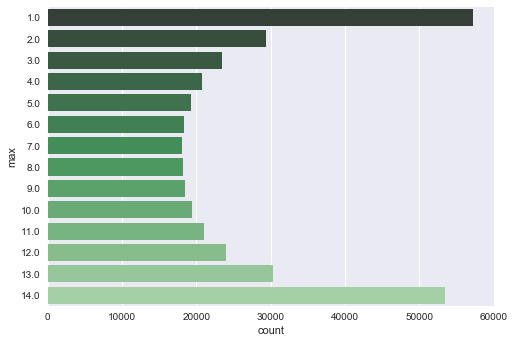

In [33]:
import seaborn as sns
sns.countplot(y='max', data=aud_wlagged, palette="Greens_d")

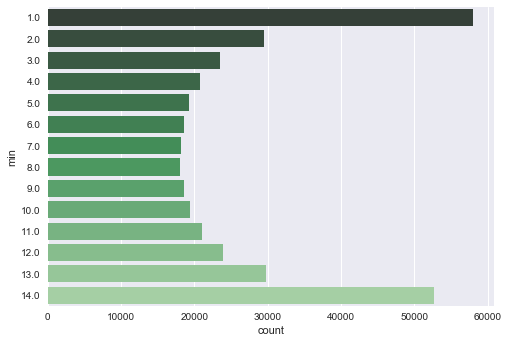

In [34]:
sns.countplot(y='min', data=aud_wlagged, palette="Greens_d")

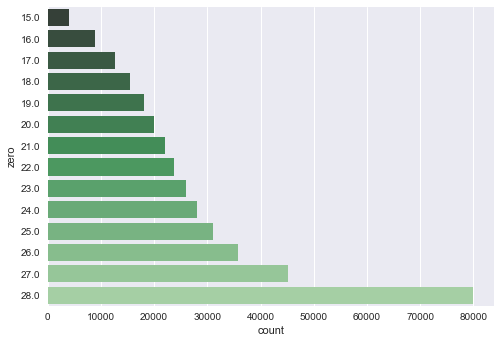

In [35]:
import seaborn as sns
sns.countplot(y='zero', data=aud_wlagged, palette="Greens_d")

In [16]:
# regress how to tell whether it is going to be a max, a min, or closest to zero
# is there a reliable signal for what will be a max, a min, or closest to zero

In [ ]:
#aud_wlagged3["time",'return_1','return_8','return_15', "std2", "std8", "std15","max", "min", "zero"]
#aud_wlagged3 = aud_wlagged["time",'return_1','return_8','return_15', "std2", "std8", "std15","max", "min", "zero"]


In [53]:
import statsmodels.formula.api as sm
result = sm.ols(formula="max ~  return_1 + return_8 + return_15 + std2 + std8 + std15 + hour_bucket", data=aud_wlagged).fit()
print result.params

Intercept          7.372718
return_1       -4078.062415
return_8         666.846947
return_15       3500.767766
std2            1812.222477
std8          -10594.011048
std15           7365.686576
hour_bucket        0.005805
dtype: float64


In [52]:
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                   zero   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                 1.003e+04
Date:                Sat, 08 Apr 2017   Prob (F-statistic):               0.00
Time:                        12:39:39   Log-Likelihood:            -9.7712e+05
No. Observations:              370990   AIC:                         1.954e+06
Df Residuals:                  370982   BIC:                         1.954e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      23.5343      0.014   1738.289      

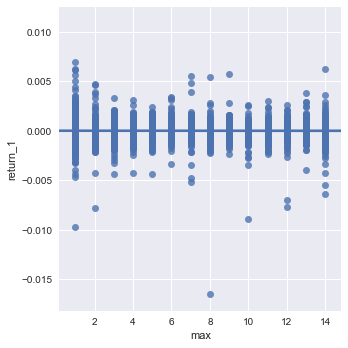

In [45]:
import seaborn as sns
sns.lmplot(x='max',y='return_1',data=aud_wlagged,fit_reg=True)

In [ ]:
# project: data acquisition, pre processing, exploration, learning, evaluation (visualization), model/story/prediction/exploration


In [ ]:
# how about if returns are positive or negative.. will that explain if returns min or max... doesnt really look like it

In [117]:
dtc = sklearn.tree.DecisionTreeClassifier(max_depth=3)

In [118]:
X = aud_wlagged[['return_1','return_8', 'hour_bucket']]

y = aud_wlagged.max

dtc.fit(X, y)

#dtc.predict([[2, 30, 1]])

TypeError: Singleton array array(<bound method DataFrame.max of             date    time  hour_bucket  return_1  return_8  return_15    price  \
15      20160103  172000           17 -0.000137 -0.000014   0.000000  0.72857   
16      20160103  172100           17  0.000206  0.000027   0.000000  0.72872   
17      20160103  172300           17 -0.000151 -0.000055   0.000233  0.72861   
18      20160103  172400           17 -0.000014  0.000069   0.000137  0.72860   
19      20160103  172600           17  0.000000  0.000082   0.000192  0.72860   
20      20160103  172700           17 -0.000027  0.000096   0.000137  0.72858   
21      20160103  172800           17  0.000192  0.000082   0.000178  0.72872   
22      20160103  172900           17  0.000000  0.000069   0.000192  0.72872   
23      20160103  173000           17  0.000000  0.000206   0.000027  0.72872   
24      20160103  173100           17  0.000014  0.000014   0.000110  0.72873   
25      20160103  173200           17 -0.000027  0.000137   0.000220  0.72871   
26      20160103  173300           17  0.000110  0.000261   0.000343  0.72879   
27      20160103  173400           17 -0.000096  0.000165   0.000288  0.72872   
28      20160103  173500           17  0.000027  0.000220   0.000110  0.72874   
29      20160103  173600           17 -0.000027  0.000000   0.000069  0.72872   
30      20160103  173700           17 -0.000014 -0.000014   0.000192  0.72871   
31      20160103  173800           17  0.000014  0.000000   0.000000  0.72872   
32      20160103  173900           17  0.000123  0.000110   0.000274  0.72881   
33      20160103  174000           17  0.000082  0.000220   0.000371  0.72887   
34      20160103  174100           17  0.000549  0.000658   0.000919  0.72927   
35      20160103  174200           17 -0.000521  0.000233   0.000425  0.72889   
36      20160103  174400           17 -0.000329 -0.000124  -0.000096  0.72865   
37      20160103  174500           17  0.000082 -0.000014  -0.000014  0.72871   
38      20160103  174600           17 -0.000055 -0.000055  -0.000069  0.72867   
39      20160103  174700           17  0.000316  0.000247   0.000233  0.72890   
40      20160103  174800           17 -0.000165 -0.000041   0.000096  0.72878   
41      20160103  174900           17  0.000000 -0.000123  -0.000014  0.72878   
42      20160103  175100           17 -0.000110 -0.000782  -0.000027  0.72870   
43      20160103  175200           17 -0.000014 -0.000274  -0.000069  0.72869   
44      20160103  175300           17  0.000000  0.000055  -0.000041  0.72869   
...          ...     ...          ...       ...       ...        ...      ...   
370975  20161230  162500           16 -0.000014 -0.000374  -0.000929  0.72108   
370976  20161230  162600           16 -0.000069 -0.000444  -0.001012  0.72103   
370977  20161230  162700           16 -0.000111 -0.000416  -0.001109  0.72095   
370978  20161230  162800           16  0.000055 -0.000222  -0.000901  0.72099   
370979  20161230  162900           16 -0.000291 -0.000499  -0.001095  0.72078   
370980  20161230  163000           16  0.000083 -0.000333  -0.001012  0.72084   
370981  20161230  163100           16 -0.000139 -0.000472  -0.001054  0.72074   
370982  20161230  163200           16 -0.000236 -0.000721  -0.001082  0.72057   
370983  20161230  163300           16  0.000069 -0.000638  -0.001013  0.72062   
370984  20161230  163400           16  0.000042 -0.000527  -0.000832  0.72065   
370985  20161230  163500           16 -0.000056 -0.000472  -0.000749  0.72061   
370986  20161230  163600           16 -0.000056 -0.000583  -0.000791  0.72057   
370987  20161230  163800           16  0.000111 -0.000180  -0.000597  0.72065   
370988  20161230  163900           16 -0.000042 -0.000305  -0.000638  0.72062   
370989  20161230  164100           16  0.000000 -0.000167  -0.000652  0.72062   
370990  20161230  164200           16 -0.000069  0.000000  -0.000708  0.72057   
370991  20161230  164300           16  0.000153  0.000083  -0.000486  0.72068   
370992  20161230  164400           16  0.000000  0.000042  -0.000375  0.72068   
370993  20161230  164500           16  0.000000  0.000097  -0.000430  0.72068   
370994  20161230  164600           16  0.000236  0.000389   0.000097  0.72085   
370995  20161230  164800           16 -0.000014  0.000264   0.000000  0.72084   
370996  20161230  164900           16 -0.000139  0.000167   0.000000  0.72074   
370997  20161230  165000           16 -0.000222 -0.000056   0.000014  0.72058   
370998  20161230  165100           16 -0.000194 -0.000180  -0.000250  0.72044   
370999  20161230  165200           16  0.000153 -0.000180  -0.000139  0.72055   
371000  20161230  165300           16  0.000000 -0.000180  -0.000083  0.72055   
371001  20161230  165400           16 -0.000014 -0.000194  -0.000042  0.72054   
371002  20161230  165500           16 -0.000236 -0.000666  -0.000389  0.72037   
371003  20161230  165600           16 -0.000375 -0.001027  -0.000722  0.72010   
371004  20161230  165700           16 -0.000014 -0.000902  -0.000736  0.72009   

                std2      std8     std15  ...        20       21       22  \
15      7.071068e-05  0.000072  0.000115  ...   0.00008  0.00013  0.00001   
16      1.060660e-04  0.000075  0.000089  ...   0.00017  0.00007  0.00002   
17      7.778175e-05  0.000074  0.000081  ...   0.00007  0.00006  0.00004   
18      7.071068e-06  0.000071  0.000078  ...   0.00009  0.00006  0.00005   
19      1.682717e-10  0.000065  0.000068  ...   0.00006  0.00009  0.00006   
20      1.414214e-05  0.000052  0.000060  ...   0.00009  0.00008  0.00007   
21      9.899495e-05  0.000061  0.000066  ...   0.00015  0.00005  0.00006   
22      3.627208e-10  0.000067  0.000070  ...   0.00000  0.00015  0.00005   
23      3.627208e-10  0.000066  0.000072  ...   0.00011  0.00000  0.00015   
24      7.071068e-06  0.000067  0.000077  ...   0.00013  0.00012  0.00001   
25      1.414214e-05  0.000066  0.000075  ...   0.00011  0.00011  0.00010   
26      5.656854e-05  0.000070  0.000078  ...   0.00021  0.00019  0.00019   
27      4.949747e-05  0.000059  0.000067  ...   0.00000  0.00014  0.00012   
28      1.414214e-05  0.000025  0.000069  ...   0.00002  0.00002  0.00016   
29      1.414214e-05  0.000025  0.000070  ...   0.00000  0.00000  0.00000   
30      7.071068e-06  0.000026  0.000063  ...   0.00002  0.00001  0.00001   
31      7.071068e-06  0.000026  0.000063  ...   0.00001  0.00001  0.00000   
32      6.363961e-05  0.000039  0.000065  ...   0.00002  0.00010  0.00008   
33      4.242641e-05  0.000058  0.000071  ...   0.00015  0.00008  0.00016   
34      2.828427e-04  0.000190  0.000152  ...   0.00053  0.00055  0.00048   
35      2.687006e-04  0.000187  0.000145  ...   0.00017  0.00015  0.00017   
36      1.697056e-04  0.000196  0.000149  ...   0.00006  0.00007  0.00009   
37      4.242641e-05  0.000197  0.000149  ...   0.00001  0.00000  0.00001   
38      2.828427e-05  0.000201  0.000151  ...   0.00014  0.00005  0.00004   
39      1.626346e-04  0.000198  0.000153  ...   0.00003  0.00009  0.00018   
40      8.485281e-05  0.000199  0.000152  ...   0.00049  0.00009  0.00003   
41      4.376144e-10  0.000200  0.000152  ...   0.00011  0.00049  0.00009   
42      5.656854e-05  0.000095  0.000153  ...   0.00005  0.00019  0.00057   
43      7.071068e-06  0.000082  0.000154  ...   0.00002  0.00004  0.00020   
44      4.121373e-10  0.000077  0.000156  ...   0.00002  0.00002  0.00004   
...              ...       ...       ...  ...       ...      ...      ...   
370975  7.071268e-06  0.000099  0.000255  ...   0.00017  0.00027  0.00027   
370976  3.535538e-05  0.000067  0.000242  ...   0.00012  0.00022  0.00032   
370977  5.656857e-05  0.000063  0.000225  ...   0.00019  0.00020  0.00030   
370978  2.828432e-05  0.000061  0.000208  ...   0.00009  0.00015  0.00016   
370979  1.484924e-04  0.000106  0.000211  ...   0.00030  0.00030  0.00036   
370980  4.242644e-05  0.000117  0.000193  ...   0.00025  0.00024  0.00024   
370981  7.071070e-05  0.000135  0.000183  ...   0.00034  0.00035  0.00034   
370982  1.202082e-04  0.000172  0.000204  ...   0.00046  0.00051  0.00052   
370983  3.535538e-05  0.000169  0.000204  ...   0.00033  0.00041  0.00046   
370984  2.121327e-05  0.000153  0.000202  ...   0.00034  0.00030  0.00038   
370985  2.828432e-05  0.000142  0.000206  ...   0.00017  0.00038  0.00034   
370986  2.828432e-05  0.000102  0.000207  ...   0.00027  0.00021  0.00042   
370987  5.656857e-05  0.000092  0.000202  ...   0.00009  0.00019  0.00013   
370988  2.121327e-05  0.000054  0.000194  ...   0.00005  0.00012  0.00022   
370989  5.383402e-08  0.000031  0.000179  ...   0.00000  0.00005  0.00012   
370990  3.535538e-05  0.000031  0.000160  ...   0.00008  0.00005  0.00000   
370991  7.778176e-05  0.000039  0.000136  ...   0.00007  0.00003  0.00006   
370992  5.375055e-08  0.000043  0.000116  ...   0.00011  0.00007  0.00003   
370993  5.375055e-08  0.000047  0.000078  ...   0.00003  0.00011  0.00007   
370994  1.202082e-04  0.000083  0.000088  ...   0.00023  0.00020  0.00028   
370995  7.071270e-06  0.000102  0.000088  ...   0.00022  0.00022  0.00019   
370996  7.071070e-05  0.000098  0.000088  ...   0.00017  0.00012  0.00012   
370997  1.131371e-04  0.000104  0.000087  ...   0.00010  0.00001  0.00004   
370998  9.899496e-05  0.000134  0.000104  ...   0.00024  0.00024  0.00013   
370999  7.778176e-05  0.000142  0.000107  ...   0.00013  0.00013  0.00013   
371000  5.393123e-08  0.000148  0.000110  ...   0.00030  0.00013  0.00013   
371001  7.071274e-06  0.000153  0.000112  ...   0.00030  0.00031  0.00014   
371002  1.202082e-04  0.000151  0.000131  ...   0.00037  0.00047  0.00048   
371003  1.909188e-04  0.000189  0.000188  ...   0.00048  0.00064  0.00074   
371004  7.071278e-06  0.000202  0.000227  ...   0.00035  0.00049  0.00065   

             23       24       25       26       27       28  zero  
15      0.00002  0.00009  0.00011  0.00007  0.00013  0.00033  28.0  
16      0.00014  0.00013  0.00024  0.00026  0.00022  0.00028  28.0  
17      0.00009  0.00003  0.00002  0.00013  0.00015  0.00011  27.0  
18      0.00005  0.00010  0.00002  0.00001  0.00012  0.00014  28.0  
19      0.00005  0.00005  0.00010  0.00002  0.00001  0.00012  17.0  
20      0.00004  0.00003  0.00007  0.00012  0.00000  0.00001  18.0  
21      0.00021  0.00018  0.00017  0.00007  0.00002  0.00014  23.0  
22      0.00006  0.00021  0.00018  0.00017  0.00007  0.00002  24.0  
23      0.00005  0.00006  0.00021  0.00018  0.00017  0.00007  25.0  
24      0.00016  0.00006  0.00007  0.00022  0.00019  0.00018  26.0  
25      0.00001  0.00014  0.00004  0.00005  0.00020  0.00017  27.0  
26      0.00018  0.00007  0.00022  0.00012  0.00013  0.00028  28.0  
27      0.00012  0.00011  0.00000  0.00015  0.00005  0.00006  26.0  
28      0.00014  0.00014  0.00013  0.00002  0.00017  0.00007  27.0  
29      0.00014  0.00012  0.00012  0.00011  0.00000  0.00015  28.0  
30      0.00001  0.00013  0.00011  0.00011  0.00010  0.00001  24.0  
31      0.00000  0.00000  0.00014  0.00012  0.00012  0.00011  25.0  
32      0.00009  0.00009  0.00009  0.00023  0.00021  0.00021  26.0  
33      0.00014  0.00015  0.00015  0.00015  0.00029  0.00027  27.0  
34      0.00056  0.00054  0.00055  0.00055  0.00055  0.00069  28.0  
35      0.00010  0.00018  0.00016  0.00017  0.00017  0.00017  15.0  
36      0.00007  0.00014  0.00006  0.00008  0.00007  0.00007  16.0  
37      0.00003  0.00001  0.00008  0.00000  0.00002  0.00001  17.0  
38      0.00005  0.00007  0.00005  0.00012  0.00004  0.00006  18.0  
39      0.00019  0.00018  0.00016  0.00018  0.00011  0.00019  19.0  
40      0.00006  0.00007  0.00006  0.00004  0.00006  0.00001  20.0  
41      0.00003  0.00006  0.00007  0.00006  0.00004  0.00006  21.0  
42      0.00017  0.00011  0.00002  0.00001  0.00002  0.00004  22.0  
43      0.00058  0.00018  0.00012  0.00003  0.00002  0.00003  23.0  
44      0.00020  0.00058  0.00018  0.00012  0.00003  0.00002  24.0  
...         ...      ...      ...      ...      ...      ...   ...  
370975  0.00042  0.00049  0.00049  0.00056  0.00067  0.00068  28.0  
370976  0.00032  0.00047  0.00054  0.00054  0.00061  0.00072  28.0  
370977  0.00040  0.00040  0.00055  0.00062  0.00062  0.00069  28.0  
370978  0.00026  0.00036  0.00036  0.00051  0.00058  0.00058  27.0  
370979  0.00037  0.00047  0.00057  0.00057  0.00072  0.00079  28.0  
370980  0.00030  0.00031  0.00041  0.00051  0.00051  0.00066  28.0  
370981  0.00034  0.00040  0.00041  0.00051  0.00061  0.00061  27.0  
370982  0.00051  0.00051  0.00057  0.00058  0.00068  0.00078  28.0  
370983  0.00047  0.00046  0.00046  0.00052  0.00053  0.00063  28.0  
370984  0.00043  0.00044  0.00043  0.00043  0.00049  0.00050  28.0  
370985  0.00042  0.00047  0.00048  0.00047  0.00047  0.00053  28.0  
370986  0.00038  0.00046  0.00051  0.00052  0.00051  0.00051  26.0  
370987  0.00034  0.00030  0.00038  0.00043  0.00044  0.00043  27.0  
370988  0.00016  0.00037  0.00033  0.00041  0.00046  0.00047  28.0  
370989  0.00022  0.00016  0.00037  0.00033  0.00041  0.00046  28.0  
370990  0.00017  0.00027  0.00021  0.00042  0.00038  0.00046  28.0  
370991  0.00011  0.00006  0.00016  0.00010  0.00031  0.00027  27.0  
370992  0.00006  0.00011  0.00006  0.00016  0.00010  0.00031  28.0  
370993  0.00003  0.00006  0.00011  0.00006  0.00016  0.00010  27.0  
370994  0.00024  0.00020  0.00023  0.00028  0.00011  0.00001  18.0  
370995  0.00027  0.00023  0.00019  0.00022  0.00027  0.00010  19.0  
370996  0.00009  0.00017  0.00013  0.00009  0.00012  0.00017  20.0  
370997  0.00004  0.00007  0.00001  0.00003  0.00007  0.00004  17.0  
370998  0.00018  0.00018  0.00021  0.00013  0.00017  0.00021  18.0  
370999  0.00002  0.00007  0.00007  0.00010  0.00002  0.00006  19.0  
371000  0.00013  0.00002  0.00007  0.00007  0.00010  0.00002  20.0  
371001  0.00014  0.00014  0.00003  0.00008  0.00008  0.00011  21.0  
371002  0.00031  0.00031  0.00031  0.00020  0.00025  0.00025  22.0  
371003  0.00075  0.00058  0.00058  0.00058  0.00047  0.00052  23.0  
371004  0.00075  0.00076  0.00059  0.00059  0.00059  0.00048  24.0  

[370990 rows x 55 columns]>, dtype=object) cannot be considered a valid collection.

In [113]:
#max_dropped = aud_wlagged.drop[aud_wlagged[aud_wlagged['max'] != 1 ]]
max_dropped = aud_wlagged.drop(aud_wlagged[(aud_wlagged['max'] < 14) & (aud_wlagged['max'] > 1)].index)
max_dropped

,date,time,hour_bucket,return_1,return_8,return_15,price,std2,std8,std15,...,20,21,22,23,24,25,26,27,28,zero
15,20160103,172000,17,-0.000137,-0.000014,0.000000,0.72857,7.071068e-05,0.000072,0.000115,...,0.00008,0.00013,0.00001,0.00002,0.00009,0.00011,0.00007,0.00013,0.00033,28.0
16,20160103,172100,17,0.000206,0.000027,0.000000,0.72872,1.060660e-04,0.000075,0.000089,...,0.00017,0.00007,0.00002,0.00014,0.00013,0.00024,0.00026,0.00022,0.00028,28.0
18,20160103,172400,17,-0.000014,0.000069,0.000137,0.72860,7.071068e-06,0.000071,0.000078,...,0.00009,0.00006,0.00005,0.00005,0.00010,0.00002,0.00001,0.00012,0.00014,28.0
19,20160103,172600,17,0.000000,0.000082,0.000192,0.72860,1.682717e-10,0.000065,0.000068,...,0.00006,0.00009,0.00006,0.00005,0.00005,0.00010,0.00002,0.00001,0.00012,17.0
26,20160103,173300,17,0.000110,0.000261,0.000343,0.72879,5.656854e-05,0.000070,0.000078,...,0.00021,0.00019,0.00019,0.00018,0.00007,0.00022,0.00012,0.00013,0.00028,28.0
29,20160103,173600,17,-0.000027,0.000000,0.000069,0.72872,1.414214e-05,0.000025,0.000070,...,0.00000,0.00000,0.00000,0.00014,0.00012,0.00012,0.00011,0.00000,0.00015,28.0
34,20160103,174100,17,0.000549,0.000658,0.000919,0.72927,2.828427e-04,0.000190,0.000152,...,0.00053,0.00055,0.00048,0.00056,0.00054,0.00055,0.00055,0.00055,0.00069,28.0
37,20160103,174500,17,0.000082,-0.000014,-0.000014,0.72871,4.242641e-05,0.000197,0.000149,...,0.00001,0.00000,0.00001,0.00003,0.00001,0.00008,0.00000,0.00002,0.00001,17.0
50,20160103,175900,17,0.000494,0.001056,0.000795,0.72947,2.545584e-04,0.000271,0.000214,...,0.00078,0.00078,0.00077,0.00069,0.00069,0.00057,0.00080,0.00076,0.00082,28.0
52,20160103,180100,18,0.000480,0.001591,0.001563,0.72985,2.474874e-04,0.000419,0.000364,...,0.00107,0.00097,0.00116,0.00116,0.00115,0.00107,0.00107,0.00095,0.00118,28.0


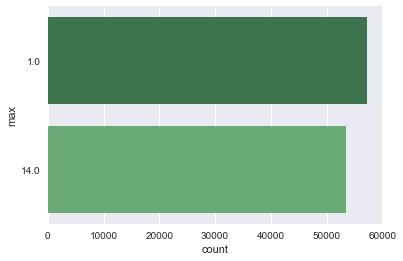

In [114]:
import seaborn as sns
sns.countplot(y='max', data=max_dropped, palette="Greens_d")

In [115]:
result = sm.ols(formula="max ~  return_1 + return_8 + return_15 + std2 + std8 + std15 + hour_bucket", data=max_dropped).fit()
print result.params

Intercept         6.936415
return_1      -5397.306586
return_8        517.811134
return_15      4844.170652
std2           1430.770102
std8          -5293.095443
std15          5404.658060
hour_bucket       0.009480
dtype: float64


In [116]:
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                    max   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                 1.821e+04
Date:                Sat, 08 Apr 2017   Prob (F-statistic):               0.00
Time:                        13:36:16   Log-Likelihood:            -3.2175e+05
No. Observations:              110683   AIC:                         6.435e+05
Df Residuals:                  110675   BIC:                         6.436e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       6.9364      0.033    209.429      

In [168]:
dtc = sklearn.tree.DecisionTreeClassifier(max_depth=1)

#X = max_dropped['return_8']

#y = max_dropped.return_1

#dtc.fit(X, y)

#dtc.predict([[2, 30, 1]])

import sklearn.tree
Trying_to_predict = max_dropped[['max']]
Source_data = max_dropped[['return_1','return_8','return_15','hour_bucket','std2','std8','std15']]
dtc = sklearn.tree.DecisionTreeClassifier(criterion='gini',max_depth=6)

dtc.fit(Source_data,Trying_to_predict)


#Predictions = dtc.predict(Source_data)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [169]:
dtc.feature_importances_

array([  6.71927039e-02,   1.14819888e-02,   9.21252440e-01,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         7.28672408e-05])

In [170]:
from StringIO import StringIO
import IPython.display
import pydot
File_obj = StringIO()
print File_obj

<StringIO.StringIO instance at 0x18eb6da70>


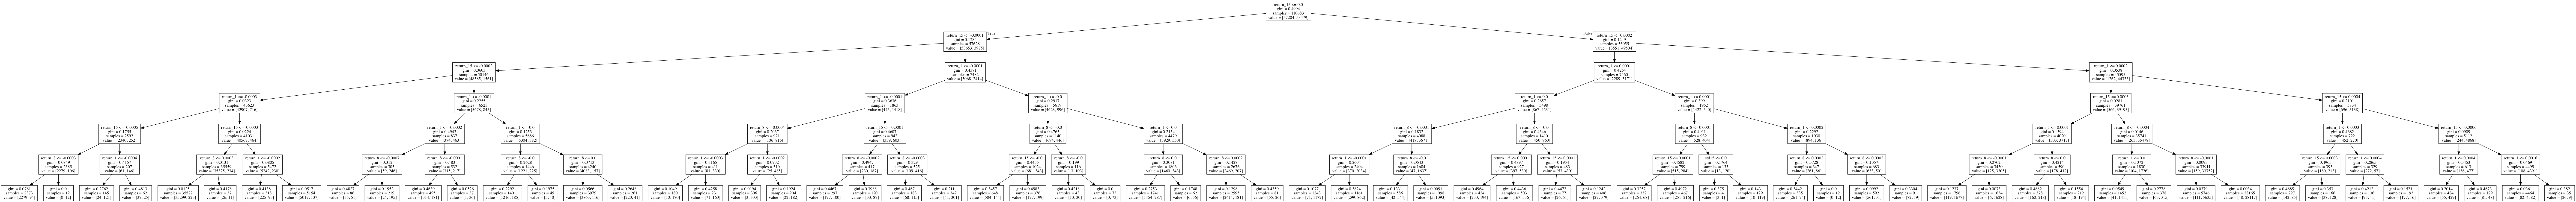

In [171]:
sklearn.tree.export_graphviz(dtc, out_file=File_obj, feature_names=['return_1','return_8','return_15',
                                                                    'hour_bucket','std2','std8','std15'])
Graph = pydot.graph_from_dot_data(File_obj.getvalue())
IPython.display.Image(Graph[0].create_png())